<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Reproducible Papers - Syngine Paper</div>
        </div>
    </div>
</div>

---

# Figure 8: Education

This notebook is part of the supplementary materials for the Syngine paper and reproduces figure 8.

This notebook creates the phase relative times figure. Requires matplotlib >= 1.5 and an ObsPy version (>= 1.0) with the syngine client.

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))

In [1]:
%matplotlib inline

import obspy
import numpy as np

from obspy.clients.syngine import Client

import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.style.use("seaborn-paper")

In [2]:
c = Client()

In [3]:
# Get seismograms for various strike values.
_d_plane_crossing = []

for strike in np.linspace(85, 95, 11):
    print(strike)
    _d_plane_crossing.append((strike, c.get_waveforms(model="ak135f_5s",
        receiverlatitude=0.0, receiverlongitude=0.0,
        sourcelatitude=0.0, sourcelongitude=30.0, components="Z", units="velocity",
        sourcedepthinmeters=0.0, sourcedoublecouple=[strike, 90.0, 0.0])[0]))

85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0


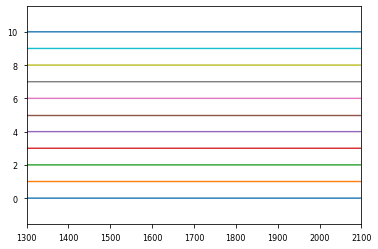

In [4]:
max_amp = max(np.abs(_i[1].data).max() for _i in _d_plane_crossing)

for _i, tr in enumerate(_d_plane_crossing):
    plt.plot(tr[1].data / max_amp + _i)
plt.xlim(1300, 2100)
plt.show()

In [5]:
_d_depth = []

# Get seismograms for various depths.
for depth in [10, 20, 30, 40, 50, 100, 200]:
    print(depth)
    _d_depth.append((depth, c.get_waveforms(model="ak135f_5s",
        receiverlatitude=0.0, receiverlongitude=0.0,
        sourcelatitude=0.0, sourcelongitude=30.0, components="Z", units="velocity",
        sourcedepthinmeters=depth * 1000, sourcemomenttensor=[1E20, 0, 0, 0, 0, 0])[0]))    

10
20
30
40
50
100
200


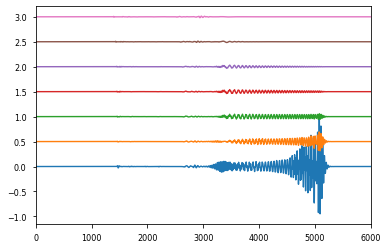

In [6]:
max_amp = max(np.abs(_i[1].data).max() for _i in _d_depth)

for _i, tr in enumerate(_d_depth):
    plt.plot(tr[1].data / max_amp + _i * 0.5)
plt.xlim(0, 6000)
plt.show()

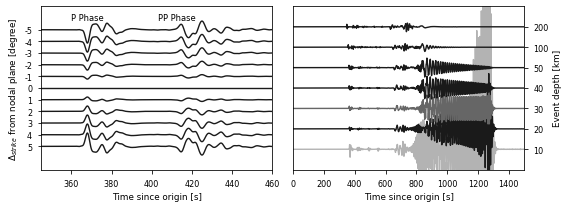

In [7]:
# Plot everything.
plt.figure(figsize=(8, 3))

plt.subplot(121)

max_amp = max(np.abs(_i[1].data).max() for _i in _d_plane_crossing)

ticks = []
labels = []

for _i, tr in enumerate(_d_plane_crossing):
    plt.plot(tr[1].times(), tr[1].data / max_amp * 200.4 + _i, color="0.1")
    ticks.append(_i)
    labels.append("%i" % (90.0 - tr[0]))
plt.xlim(345, 460)
plt.text(360, 10.8, "P Phase", size="small")
plt.text(403, 10.8, "PP Phase", size="small")
plt.ylim(-2, 12)
plt.xlabel("Time since origin [s]")
plt.ylabel("$\Delta_{strike}$ from nodal plane [degree]")
plt.yticks(ticks, labels)

plt.subplot(122)
max_amp = max(np.abs(_i[1].data).max() for _i in _d_depth)

colors = ["0.7", "0.1", "0.4", "0.1", "0.1", "0.1", "0.1"]

ticks = []
labels = []
for _i, tr in enumerate(_d_depth):
    plt.plot(tr[1].times(), tr[1].data / max_amp * 14.0 + _i, color=colors[_i])
    ticks.append(_i)
    labels.append("%i" % (tr[0]))
plt.xlim(0, 1500)
plt.gca().yaxis.tick_right()
plt.xlabel("Time since origin [s]")
plt.gca().yaxis.set_label_position("right")
plt.ylabel("Event depth [km]")
plt.yticks(ticks, labels)
plt.tight_layout()
plt.ylim(-1, 7)
plt.savefig("education.pdf")
plt.show()